In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load dataset

##### Method

In [2]:
def download_stock_data(ticker,timestamp_start,timestamp_end):
    url=f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={timestamp_start}&period2={timestamp_end}&interval\
=1d&events=history&includeAdjustedClose=true"
    df = pd.read_csv(url)
    return df

##### Inputs

In [3]:
datetime_start=dt.datetime(2022, 2, 8, 7, 35, 51)
datetime_end=dt.datetime(2023, 2, 8, 7, 35, 51)

# Convert to timestamp:
timestamp_start=int(datetime_start.timestamp()) 
timestamp_end=int(datetime_end.timestamp()) 

## Loading APPLE stock prices: df

This dataframe will be used in Trend Following and Mearn Reversion algorithms 

In [4]:
df = download_stock_data("AAPL",timestamp_start,timestamp_end)
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-08,171.729996,175.350006,171.429993,174.830002,173.777313,74829200
2022-02-09,176.050003,176.649994,174.899994,176.279999,175.218567,71285000
2022-02-10,174.139999,175.479996,171.550003,172.119995,171.083618,90865900
2022-02-11,172.330002,173.080002,168.039993,168.639999,167.624603,98670700
2022-02-14,167.369995,169.580002,166.559998,168.880005,167.863159,86185500


## Loading 4 stocks prices: df_global

This dataframe will be used in Momentum algorithms. It will be considered as our portfolio and we need to get the stock having the best momentum against the others. In real world dataset, you may have a lot more stocks in your portfolio

In [5]:
tickers=['AAPL','GOOG','AMZN','NFLX']

df_global=pd.DataFrame()
for ticker in tickers:
    df_temp = download_stock_data(ticker,timestamp_start,timestamp_end)[['Date','Close']]
    df_temp = df_temp.set_index('Date')
    df_temp.columns=[ticker]
    df_global=pd.concat((df_global, df_temp),axis=1)
display(df_global.head())

,AAPL,GOOG,AMZN,NFLX
Date,,,,
2022-02-08,174.830002,139.212997,161.413498,403.529999
2022-02-09,176.279999,141.453003,161.189499,412.890015
2022-02-10,172.119995,138.602493,159.003494,406.269989
2022-02-11,168.639999,134.130005,153.293503,391.309998
2022-02-14,168.880005,135.300003,155.167007,396.570007


## Loading several stocks prices: df_global

This dataframe will be used in Momentum algorithms, also. It will be considered as representing the market. In real world dataset, there are lot more stocks to include.

In [6]:
tickers=['MSFT','META','GM','GS','TTE','F']

df_global_market=pd.DataFrame()
for ticker in tickers:
    df_temp = download_stock_data(ticker,timestamp_start,timestamp_end)[['Date','Close']]
    df_temp = df_temp.set_index('Date')
    df_temp.columns=[ticker]
    df_global_market=pd.concat((df_global_market, df_temp),axis=1)
display(df_global_market.head())

,MSFT,META,GM,GS,TTE,F
Date,,,,,,
2022-02-08,304.559998,220.179993,49.459999,370.100006,58.840000,17.719999
2022-02-09,311.209991,232.000000,50.720001,374.529999,60.029999,18.350000
2022-02-10,302.380005,228.070007,50.340000,370.570007,59.040001,18.080000
2022-02-11,295.040009,219.550003,48.830002,363.059998,58.650002,17.549999
2022-02-14,295.000000,217.699997,48.400002,360.239990,58.330002,17.459999


# Trend Following

## Moving Average Convergence Divergence (MACD) 

Moving Average Convergence Divergence (MACD) is a popular momentum and trend-following technical indicator used in financial trading. It is calculated by subtracting the 26-day exponential moving average (EMA) from the 12-day EMA. The result is the MACD line, which is plotted alongside a 9-day EMA of the MACD, known as the signal line. A buy signal is generated when the MACD line crosses above the signal line, while a sell signal is generated when the MACD line crosses below the signal line.

The MACD is often used in conjunction with other technical indicators and chart patterns to identify potential trading opportunities in financial markets. It is commonly used for stock, forex, and commodity markets, among others. The MACD is useful for traders looking to identify trend changes and momentum shifts, as well as for traders looking to confirm other technical signals.

The formula for the MACD line is as follows:

MACD Line = 12-day EMA - 26-day EMA

where the 12-day and 26-day EMA are exponential moving averages calculated as follows:

EMAn = (Price(n) - EMA(n-1)) x Multiplier + EMA(n-1)

where "n" is the current period, "Price(n)" is the closing price for the current period, "EMA(n-1)" is the previous period's EMA, and "Multiplier" is a smoothing constant calculated as 2/(time period + 1).

The formula for the 9-day EMA of the MACD line, also known as the signal line, is:

Signal Line = 9-day EMA of the MACD Line

where the 9-day EMA is calculated in the same manner as the EMA in the MACD line formula.

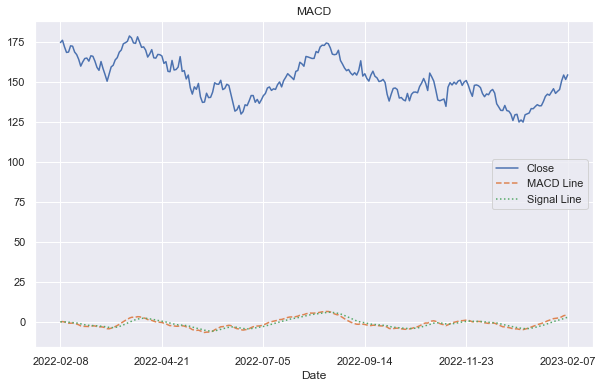

In [7]:
def calc_macd(prices, fast_window, slow_window, signal_window):
    fast_ewma = prices.ewm(span=fast_window, adjust=False).mean()
    slow_ewma = prices.ewm(span=slow_window, adjust=False).mean()
    macd = fast_ewma - slow_ewma
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

macd, signal = calc_macd(df['Close'], 12, 26, 9)
df['MACD_line']=macd
df['Signal_line']=signal
# df = df.set_index('Date')

df[['Close']].plot(label='Prices',figsize=(10,6))
plt.plot(macd, label='MACD Line', linestyle='--')
plt.plot(signal, label='Signal Line', linestyle=':')
plt.legend()
plt.title("MACD")
plt.show()

##### Focus on a certain period

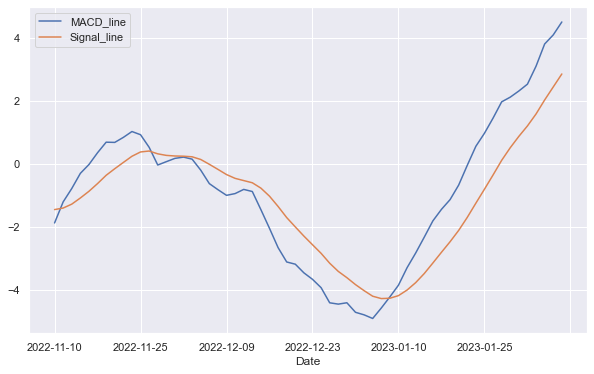

In [8]:
df.query("Date>='2022-11-10'")[['MACD_line','Signal_line']].plot(figsize=(10,6))
plt.legend()
plt.show()

## RSI: Relative Strength Index

Relative Strength Index (RSI) is a momentum oscillator that measures the strength of a security's price action. It compares the magnitude of recent gains to recent losses in order to determine overbought and oversold conditions. The RSI is calculated using a formula that assigns a value between 0 and 100, with values above 70 indicating overbought conditions and values below 30 indicating oversold conditions. This information can be used by traders to make informed buy or sell decisions.

The formula for the Relative Strength Index (RSI) is:

RSI = 100 - (100 / (1 + RS))

where RS (Relative Strength) is calculated as:

RS = average of x days' up closes / average of x days' down closes

The number of days (x) used in the calculation is a variable that is typically set to 14. The RSI oscillates between 0 and 100 and is often used in conjunction with other technical analysis tools to make buy and sell decisions.

In [9]:
def RSI(prices, n=14):
    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed >= 0].sum()/n
    down = -seed[seed < 0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1. + rs)

    for i in range(n, len(prices)):
        delta = deltas[i - 1]
        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n - 1) + upval)/n
        down = (down*(n - 1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1. + rs)

    return rsi


<AxesSubplot:xlabel='Date'>

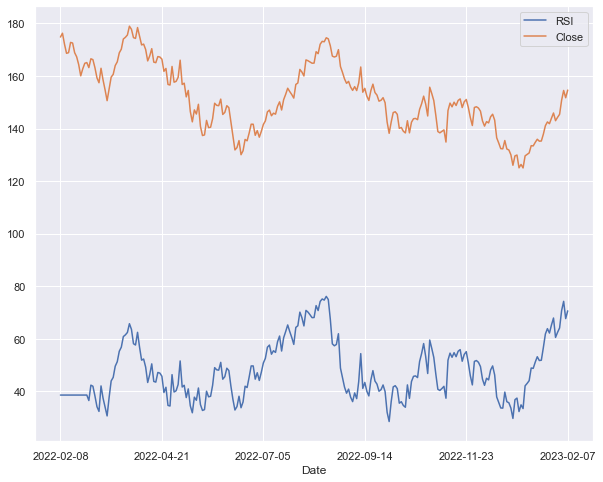

In [10]:
rsi=RSI(df['Close'], n=14)
df['RSI']=rsi
df[['RSI','Close']].plot(figsize=(10,8))

## TrendLine breakout

This algorithm identifies trendlines and enters trades when the price breaks out of the trendline.

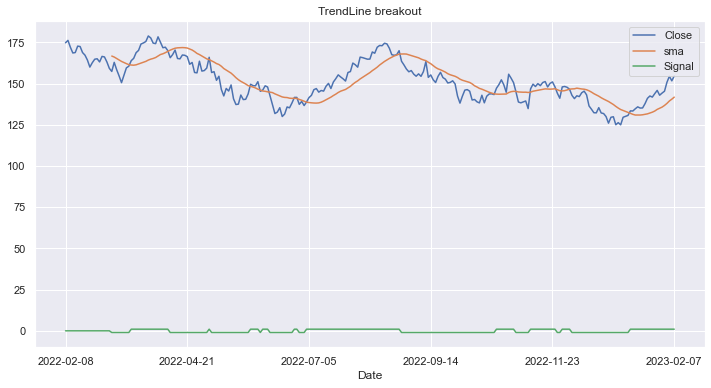

In [11]:
# Calculate the simple moving average
df['sma']=df['Close'].rolling(window=20).mean()

# Plot the stock price and simple moving average

df[['Close','sma']].plot(figsize=(12,6))
plt.legend(loc='upper left')

# Buy when stock price crosses above the 20-day SMA
buy = np.where(df['Close'] > df['sma'], 1, 0)

# Sell when stock price crosses below the 20-day SMA
sell = np.where(df['Close'] < df['sma'], -1, 0)

# Create a signal to hold, buy, or sell
signal = buy + sell

df['signal']=signal

# Plot the signal
plt.plot(signal, label='Signal')
plt.legend(loc='upper right')
plt.title("TrendLine breakout")

# Show the plot
plt.show()

##### Focus on a certain period

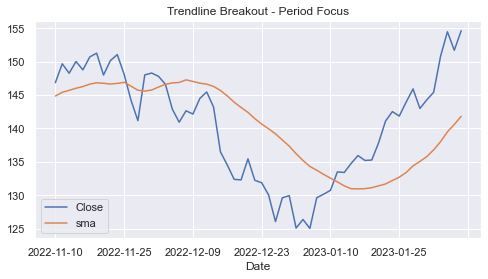

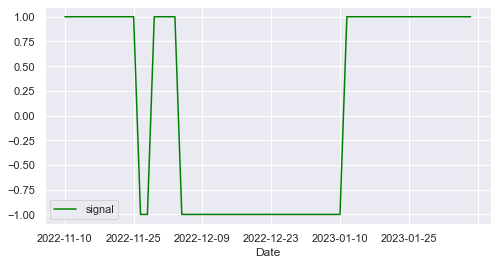

In [12]:
df.query("Date>='2022-11-10'")[['Close','sma']].plot(figsize=(8,4))
plt.legend()
plt.title("Trendline Breakout - Period Focus")
plt.show()

df.query("Date>='2022-11-10'")[['signal']].plot(figsize=(8,4),color='green')
plt.legend()
plt.show()

## Channel breakout

This algorithm identifies price channels and enters trades when the price breaks out of the channel.

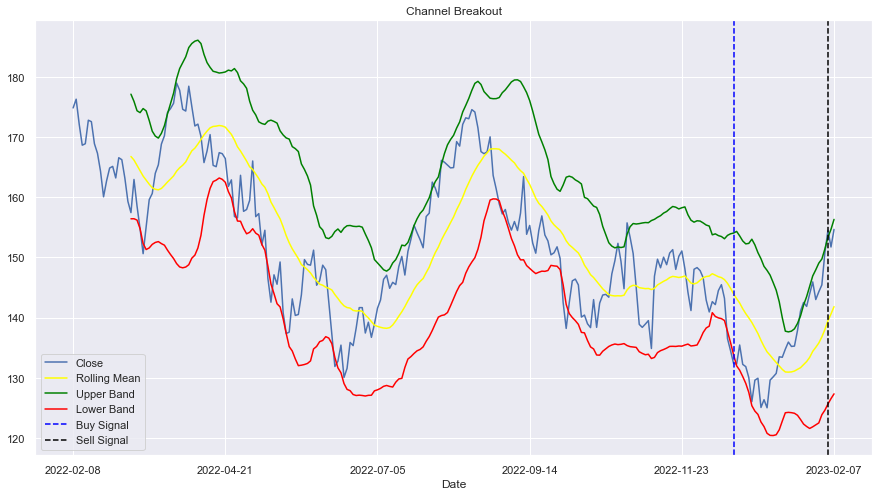

In [13]:
def channel_breakout(df, window=20, n_std=2):
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * n_std)
    lower_band = rolling_mean - (rolling_std * n_std)
    
    buy_signal = None
    sell_signal = None
    hold_signal=None
    for i in range(window, len(df)):
        if df.iloc[i]['Close'] > upper_band[i]:
            sell_signal = i
        elif df.iloc[i]['Close'] < lower_band[i]:
            buy_signal = i
        else:
            hold_signal=i
    return buy_signal, sell_signal,hold_signal, rolling_mean, upper_band, lower_band

buy_signal, sell_signal,hold_signal, rolling_mean, upper_band, lower_band = channel_breakout(df)
x=df.index.values
plt.figure(figsize=(15,8))
df['Close'].plot()
plt.plot(rolling_mean, label='Rolling Mean', color='yellow')
plt.plot(upper_band, label='Upper Band', color='green')
plt.plot(lower_band, label='Lower Band', color='red')
plt.axvline(x=buy_signal, color='blue', linestyle='--', label='Buy Signal')
plt.axvline(x=sell_signal, color='black', linestyle='--', label='Sell Signal')
# plt.axvline(x=hold_signal, color='red', linestyle='--', label='Sell Signal')
plt.legend()
plt.title('Channel Breakout')
plt.show()

## Moving Average Crossover

This algorithm uses moving averages to identify the trend of a security and to enter and exit trades based on the position of the security relative to its moving average.

C:\Users\Hanane\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Hanane\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


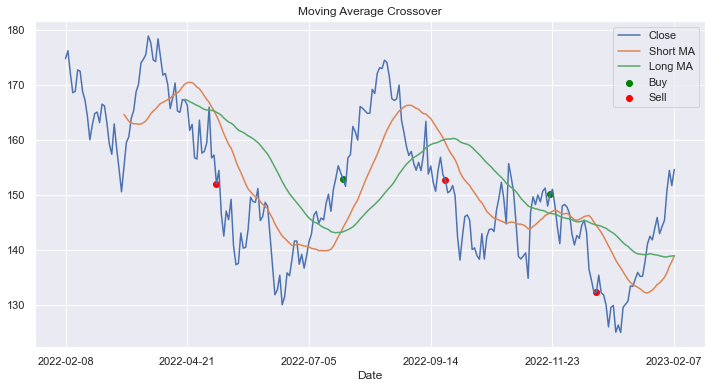

In [14]:
# Calculate the short-term and long-term moving averages
short_window = 25
long_window = 50

short_ma = df["Close"].rolling(window=short_window).mean()
long_ma = df["Close"].rolling(window=long_window).mean()

# Initialize a signal column to 0
df["Signal"] = 0

# Generate signals based on the moving average crossover
for i in range(len(df)):
    if (short_ma[i] > long_ma[i]) & (short_ma[i-1] < long_ma[i-1]):
        df["Signal"][i] = 1
    elif (short_ma[i] < long_ma[i]) & (short_ma[i-1] > long_ma[i-1]):
        df["Signal"][i] = -1

# Plot the data and signals

df["Close"].plot(figsize=(12,6))
plt.plot(short_ma, label="Short MA")
plt.plot(long_ma, label="Long MA")
plt.scatter(df.index, df["Close"].where(df["Signal"]==1, np.nan), color="green", label="Buy")
plt.scatter(df.index, df["Close"].where(df["Signal"]==-1, np.nan), color="red", label="Sell")
plt.legend(loc="upper right")
plt.title("Moving Average Crossover")
plt.show()


## Dual Moving Average Crossover

This algorithm uses two moving averages to identify trends and to enter trades based on the relationship between the two moving averages.

It's almost the same thing than the Moving Average Crossover explained just before....

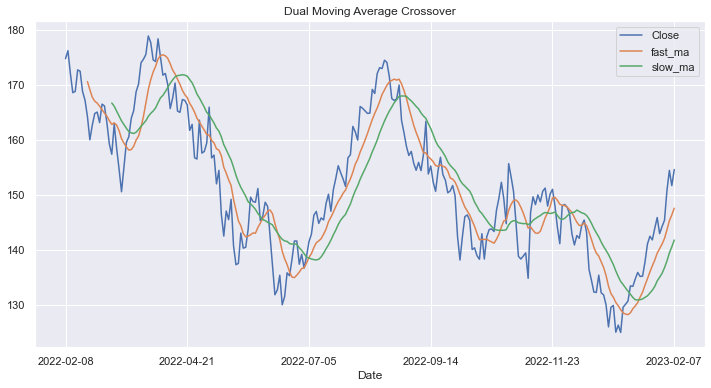

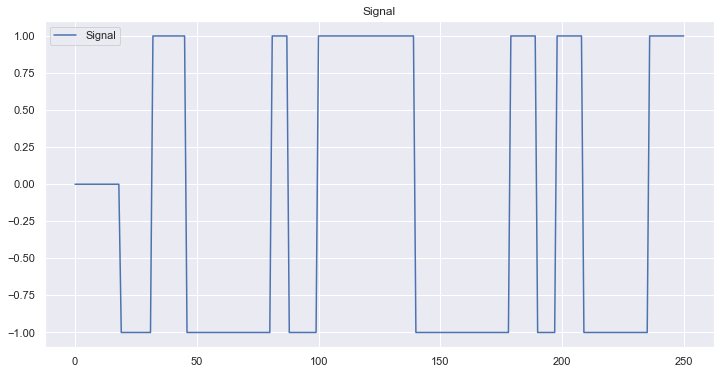

In [15]:
def dual_moving_average_crossover(data, fast_window, slow_window):
    fast_ma = data.rolling(window=fast_window).mean()
    slow_ma = data.rolling(window=slow_window).mean()
    signals = np.zeros(len(data))
    signals[fast_ma > slow_ma] = 1
    signals[fast_ma < slow_ma] = -1
    return signals, fast_ma, slow_ma

fast_window = 10
slow_window = 20
signals,fast_ma, slow_ma = dual_moving_average_crossover(df["Close"], fast_window, slow_window)


df[['Close']].plot(figsize=(12,6))
plt.plot(fast_ma, label='fast_ma')
plt.plot(slow_ma, label='slow_ma')
plt.legend()
plt.title("Dual Moving Average Crossover")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(signals, label='Signal')
plt.legend()
plt.title("Signal")
plt.show()

# Mean Reversion

Mean reversion is a statistical concept that suggests that prices or returns of a financial instrument tend to move back toward their average over time. In other words, it suggests that if the price of an asset deviates significantly from its historical average, it will tend to revert back to that average in the future. This concept is widely used in algorithmic trading and investment management, as traders and investors look for opportunities to buy undervalued assets or sell overvalued assets based on mean reversion principles.

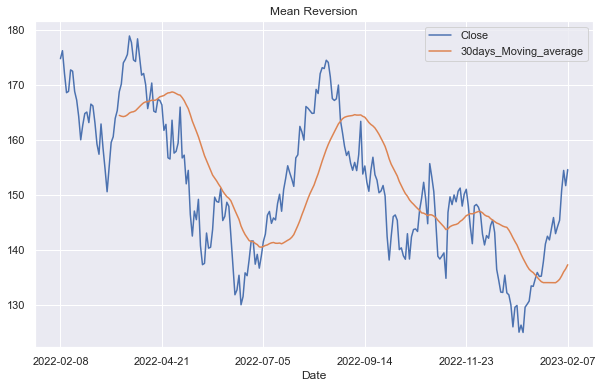

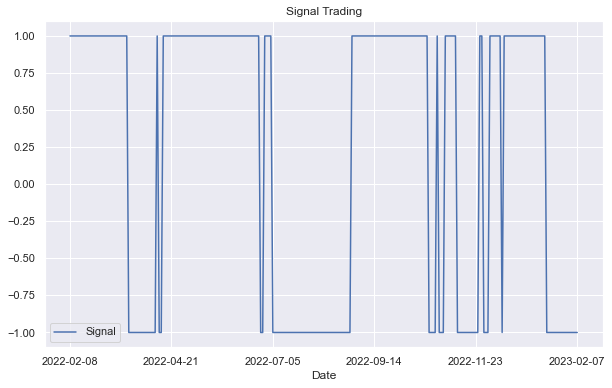

In [16]:
def mean_reversion_strategy(data, window):
    # Calculate the moving average
    moving_average = data.rolling(window=window).mean()

    # Calculate the difference between the current price and the moving average
    diff = data - moving_average

    # Define the trading signal as a function of the difference
    signal = np.where(diff > 0, -1, 1)

    return signal

# Apply the mean reversion strategy
df['Signal'] = mean_reversion_strategy(df["Close"], window=30)

# Plot the results
df['Close'].plot(figsize=(10,6))
df["Close"].rolling(window=30).mean().plot(label='30days_Moving_average')
plt.legend()
plt.title("Mean Reversion")
plt.show()

df['Signal'].plot(figsize=(10,6))
plt.legend()
plt.title("Signal Trading")
plt.show()

# Momentum Algorithms

## Absolute Momentum 

This type of momentum strategy buys an asset when its price is rising and sells when its price is falling.

### 1st implementation

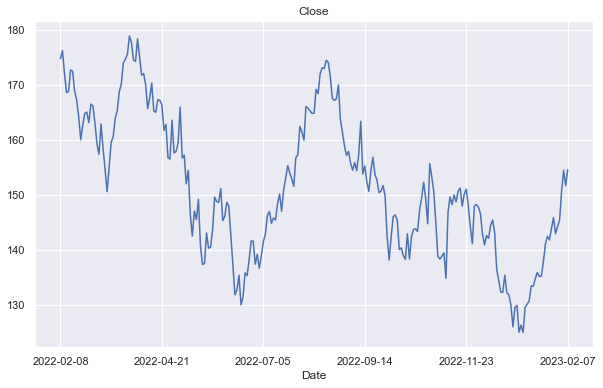

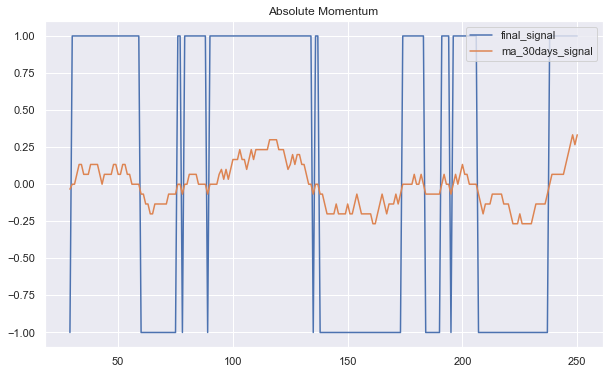

In [17]:
def absolute_momentum(df, lookback_period):
    """
    Computes the absolute momentum of a stock
    
    Parameters:
    prices (pd.Series): A series containing the stock prices
    lookback_period (int): The number of days to look back
    
    Returns:
    np.array: A binary array indicating the trade signals (1: Buy, 0: Hold, -1: Sell)
    """
    returns = df['Close'].pct_change().values
    signals = np.zeros(len(returns))
    signals[returns > 0] = 1
    signals[returns == 0] = 0
    signals[returns < 0] = -1
    df['signals']=signals
    df['signals_ma']=df['signals'].rolling(lookback_period).mean().dropna()
    df['signals_final']=df['signals_ma']
    df.loc[df.query('signals_ma>=0').index,'signals_final'] = 1
    df.loc[df.query('signals_ma<0').index,'signals_final'] = -1
    return df['signals_final'].values,df['signals_ma'].values,  df['signals'].values

signals_final,signals_ma,signals_raw = absolute_momentum(df, 30)

plt.figure(figsize=(10,6))
df['Close'].plot()
# df['Close'].pct_change().plot()
plt.title("Close")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(signals_final,label='final_signal')
plt.plot(signals_ma,label='ma_30days_signal')
plt.legend(loc='upper right')
plt.title("Absolute Momentum")
plt.show()

### 2nd implementation

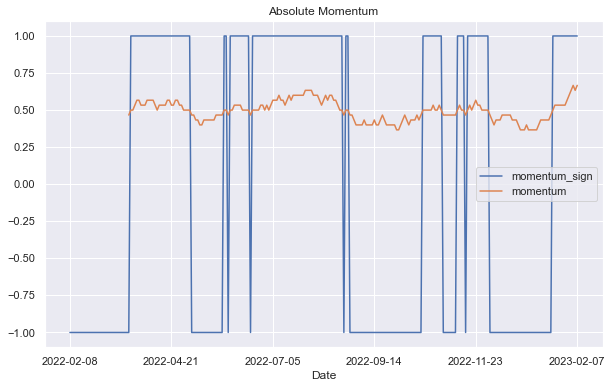

In [18]:
def absolute_momentum(data, lookback_period):
    data['price_diff'] = data['Close'].diff()
    data['price_diff_sign'] = np.where(data['price_diff'] > 0, 1, 0)
    data['momentum'] = data['price_diff_sign'].rolling(lookback_period).mean()
    data['momentum_sign'] = np.where(data['momentum'] >= 0.5, 1, -1)
    return data

df = absolute_momentum(df, lookback_period=30)
df[['momentum_sign','momentum']].plot(figsize=(10,6))
plt.title("Absolute Momentum")
plt.show()

## Dual Momentum

Dual momentum algorithm is a quantitative investment strategy that involves combining relative strength and absolute momentum signals to make investment decisions. It is based on the idea that when a stock is performing well relative to its peers, and at the same time, its absolute momentum is positive, it is likely to continue to perform well. The algorithm uses two momentum indicators to determine the stock's trend and allocate investments accordingly. This combination of relative strength and absolute momentum helps to reduce the risk of losing money during bear markets and increase the chances of generating positive returns in bull markets.

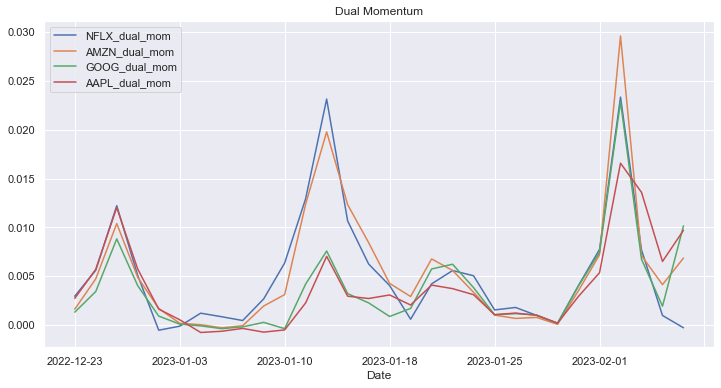

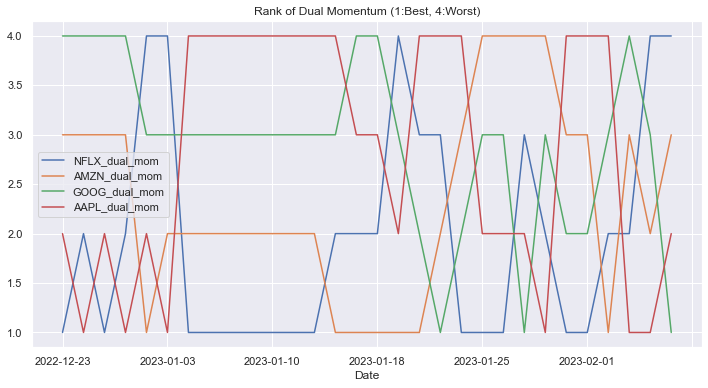

In [19]:
def dual_momentum(df_to_check,df_global_market,lookback):
    lookback=10

    # Calculate 10-days momentum of the prices
    mom = df_to_check.pct_change(lookback).dropna()

    # Calculate 10-days momentum of the global stock market
    global_mom = df_global_market.pct_change(lookback).dropna()
    global_mom_mean = global_mom.mean(axis=1)
    
    # Create a data frame to hold the final results
    results = pd.DataFrame()

    for ticker in df_global.columns:
        mom_ticker = mom[ticker]

        # Calculate the dual momentum score for this stock
        dual_mom = pd.DataFrame(mom_ticker * global_mom_mean)

        dual_mom.columns=[ticker+'_dual_mom']
        results=pd.concat((dual_mom,results),axis=1)
    return results

lookback=10
results=dual_momentum(df_global,df_global_market,lookback)

results.iloc[-30:,:].plot(figsize=(12,6))
plt.title("Dual Momentum")
plt.show()

results.apply(lambda x: x.rank(ascending=False),axis=1).iloc[-30:,:].plot(figsize=(12,6))
plt.title("Rank of Dual Momentum (1:Best, 4:Worst)")
plt.show()

In [20]:
results.apply(lambda x: x.rank(ascending=False),axis=1)

,NFLX_dual_mom,AMZN_dual_mom,GOOG_dual_mom,AAPL_dual_mom
Date,,,,
2022-02-23,2.0,1.0,4.0,3.0
2022-02-24,4.0,3.0,2.0,1.0
2022-02-25,2.0,3.0,4.0,1.0
2022-02-28,4.0,2.0,3.0,1.0
2022-03-01,2.0,3.0,4.0,1.0
...,...,...,...,...
2023-02-01,1.0,3.0,2.0,4.0
2023-02-02,2.0,1.0,3.0,4.0
2023-02-03,2.0,3.0,4.0,1.0


## Relative Momentum

Relative momentum algorithm is a type of momentum algorithm that considers the relative strength of an asset, compared to other assets, in determining the investment strategy. It is based on the idea that assets that have performed well in the recent past are likely to continue performing well in the future. The relative momentum algorithm compares the performance of different assets to each other and invests in the asset with the highest relative momentum. The algorithm adjusts its holdings based on changes in relative momentum, which helps to capture returns while also reducing the risk of large losses.

Normalized Momentum


,AAPL,GOOG,AMZN,NFLX
Date,,,,
2023-02-01,-1.069375,-0.567164,0.505515,1.131025
2023-02-02,-1.276839,-0.219498,1.065966,0.430371
2023-02-03,-0.893585,-0.672806,0.272290,1.294100
2023-02-06,-1.154779,-0.421853,0.437859,1.138773
2023-02-07,-1.497108,0.555320,0.529220,0.412568


Ranked Momentum - Rank


,AAPL,GOOG,AMZN,NFLX
Date,,,,
2023-02-01,4.0,3.0,2.0,1.0
2023-02-02,4.0,3.0,1.0,2.0
2023-02-03,4.0,3.0,2.0,1.0
2023-02-06,4.0,3.0,2.0,1.0
2023-02-07,4.0,1.0,2.0,3.0


Ranked Momentum - Values


,AAPL,AMZN,GOOG,NFLX
Date,,,,
2023-02-01,NaN,0.505515,NaN,1.131025
2023-02-02,NaN,1.065966,NaN,0.430371
2023-02-03,NaN,0.272290,NaN,1.294100
2023-02-06,NaN,0.437859,NaN,1.138773
2023-02-07,NaN,0.529220,0.55532,NaN


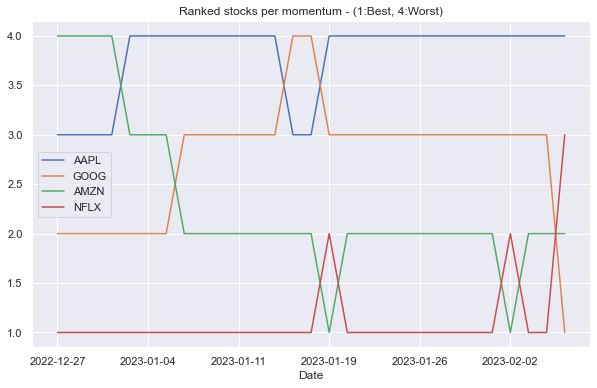

In [21]:
def top_stock(x,N=2):
    ind_top= np.argpartition(x, -N)[-N:]
    return x[ind_top]

def relative_momentum(df,lookback, N=2):
    # Calculate returns for each stock
    returns = df.pct_change()

    # Calculate the relative momentum for each stock
    momentum = returns.rolling(lookback).mean()

    # Normalize the momentum to a common scale
    normalized_momentum = momentum.subtract(momentum.mean(axis=1), axis=0)
    normalized_momentum = normalized_momentum.divide(normalized_momentum.std(axis=1), axis=0)
    
    # Rank the stocks based on their relative momentum
    ranked_momentum = normalized_momentum.rank(axis=1, method='first', ascending=False)
    ranked_momentum_2 = normalized_momentum.dropna().apply(lambda x: top_stock(x,N),axis=1)
    
    return momentum, normalized_momentum, ranked_momentum, ranked_momentum_2

lookback = 30
N=2
momentum, normalized_momentum, ranked_momentum, ranked_momentum_2 = relative_momentum(df_global,lookback)

print("Normalized Momentum")
display(normalized_momentum.tail())

print("Ranked Momentum - Rank")
display(ranked_momentum.tail())

print("Ranked Momentum - Values")
display(ranked_momentum_2.tail())

ranked_momentum.query("Date>'2022-12-23'").plot(figsize=(10,6))
plt.title("Ranked stocks per momentum - (1:Best, 4:Worst)")
plt.show()

## Cross sectional momentum

Cross-Sectional Momentum Algorithm is a type of algorithmic trading strategy that aims to capture momentum in the returns of multiple stocks in a given sector, or across multiple sectors, rather than in a single stock. It works by selecting stocks with the strongest recent returns and overweighting them in the portfolio, while underweighting stocks with weaker returns. The portfolio is rebalanced on a regular basis, such as monthly or quarterly, to maintain the momentum signal. This strategy is based on the idea that momentum in the stock market is persistent, and that stocks that have recently outperformed are more likely to continue to do so in the future.

The following implementation compares the stocks in the same portfolio. You can implement the same thing by comparing the return of this portfolio to a global market portfolio

Index(['AAPL', 'GOOG'], dtype='object')


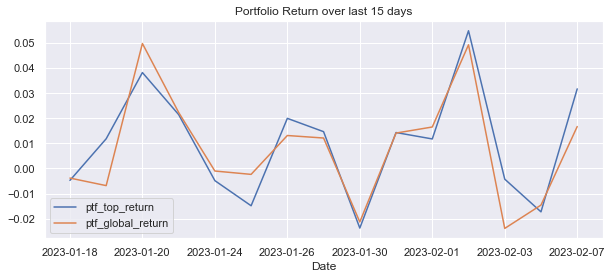

Compare average return for top 2 stocks and whole portfolio over 15 days


ptf_top_return       0.009936
ptf_global_return    0.008009
dtype: float64

In [22]:
def cross_sectional_momentum(df,window,N):

    # Calculate the daily return for each stock
    returns = df.pct_change().dropna()

    # Calculate the average returns for each stock over the past 30 days
    avg_returns = returns.iloc[-window:].mean()

    # Rank the stocks based on their average returns
    ranks = avg_returns.rank(ascending=False)

    # Select the top N stocks with the highest average returns
    top_stocks = ranks[ranks <= N].index
    print(top_stocks)

    portfolio_returns = returns[top_stocks].mean(axis=1)
    portfolio_global_returns = returns.mean(axis=1)

    df_ptf=pd.concat((returns[top_stocks],portfolio_returns,portfolio_global_returns),axis=1)\
    .rename(columns={0:"ptf_top_return",1:"ptf_global_return"})

    return df_ptf

window=15
N=2

df_ptf=cross_sectional_momentum(df_global,window,N)

df_ptf.iloc[-window:,-2:].plot(figsize=(10,4))
plt.title("Portfolio Return over last {0} days".format(window))
plt.show()

print("Compare average return for top {0} stocks and whole portfolio over {1} days".format(N,window))
display(df_ptf.iloc[-window:,-2:].mean(axis=0))
# portfolio_returns

## Time series Momentum

A time-series momentum algorithm is a type of momentum algorithm that looks for momentum trends within a single security by analyzing its past returns. The algorithm calculates the return of the security over a specified time period, and compares it to its own historical returns to determine if there is a momentum trend. If a momentum trend is identified, the algorithm will take a position in the security, either by buying or selling, depending on the direction of the momentum. The objective of this strategy is to capture momentum gains, as securities with strong positive momentum are expected to continue to outperform those with negative momentum.

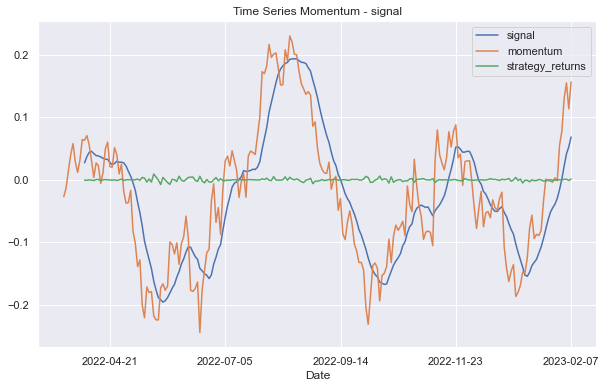

In [23]:
# Calculate the log returns of the stock prices
df['log_returns'] = np.log(df['Close'] / df['Close'].shift())

# Calculate the momentum by taking the log returns over a specified window
momentum_window = 30
df['momentum'] = df['log_returns'].rolling(window=momentum_window, min_periods=momentum_window).sum()

# Calculate the signal by taking a moving average of the momentum
signal_window = 10
df['signal'] = df['momentum'].rolling(window=signal_window, min_periods=signal_window).mean()

# Calculate the actual strategy returns by multiplying the log returns by the signal
df['strategy_returns'] = df['log_returns'] * df['signal']

df[['signal','momentum','strategy_returns']] .plot(figsize=(10,6))
plt.title("Time Series Momentum - signal")
plt.show()